In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("data.csv")

In [7]:
df.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


In [8]:
len(df)

15

In [9]:
df.columns

Index(['Height', 'Weight'], dtype='object')

In [10]:
len(df.columns)

2

In [11]:
df.isnull().sum()

Height    0
Weight    0
dtype: int64

In [12]:
df.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


In [100]:
df.describe()

,Height,Weight
count,15.000000,15.000000
mean,1.650667,62.078000
std,0.114235,7.037515
min,1.470000,52.210000
25%,1.560000,56.520000
50%,1.650000,61.290000
75%,1.740000,67.190000
max,1.830000,74.460000


### simple linear Regression

In [101]:
X = df['Height']
y = df['Weight']   # y = df.drop(['Height'] , axis = 1)

In [102]:
X.sample(5)

6     1.63
1     1.50
2     1.52
13    1.80
5     1.60
Name: Height, dtype: float64

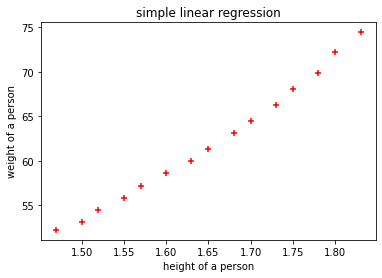

In [103]:
plt.title('simple linear regression')
plt.xlabel('height of a person')
plt.ylabel('weight of a person')
plt.scatter(df['Height'] , df['Weight'] , color = 'r' , marker = '+')
plt.show()

In [104]:
X= X.values.reshape(-1,1)

In [105]:
y.sample(5)

9     64.47
13    72.19
3     55.84
4     57.20
12    69.92
Name: Weight, dtype: float64

In [106]:
import sklearn

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.22,random_state = 11)

In [109]:
X_train

array([[1.57],
       [1.6 ],
       [1.8 ],
       [1.52],
       [1.73],
       [1.78],
       [1.65],
       [1.5 ],
       [1.75],
       [1.47],
       [1.7 ]])

In [110]:
len(X_train) , len(y_train)

(11, 11)

In [111]:
len(X_test) , len(y_test)

(4, 4)

In [112]:
from sklearn.linear_model import LinearRegression

In [113]:
reg = LinearRegression()

In [114]:
reg.fit(X_train,y_train) #X,Y sent to formula (y=mx+c)

LinearRegression()

In [115]:
reg.coef_

array([59.46453435])

In [116]:
reg.intercept_

-36.06310324445026

In [117]:
## y = 59.46453435 * x -36.06310324445026

In [118]:
y_train_pred = reg.predict(X_train)

In [120]:
y_train_pred[:5]

array([57.29621568, 59.08015171, 70.97305858, 54.32298897, 66.81054118])

In [121]:
y_train[:5]

4     57.20
5     58.57
13    72.19
2     54.48
10    66.28
Name: Weight, dtype: float64

### Training accuracy

In [122]:
from sklearn.metrics import r2_score

In [124]:
r2_score(y_train , y_train_pred) * 100

99.24611415888444

## Testing data

In [125]:
y_test_pred = reg.predict(X_test)

In [126]:
y_test_pred[:5]

array([63.83731446, 56.106925  , 72.75699461, 60.86408774])

In [127]:
y_test[:5] 

8     63.11
3     55.84
14    74.46
6     59.93
Name: Weight, dtype: float64

In [129]:
r2_score(y_test,y_test_pred)*100

97.71747491144438

#### Real data testing

In [131]:
reg.predict([[7.2]])

array([392.08154407])

In [132]:
59.46453435 * 7.2 -36.06310324445026

392.08154407554974

### Multiple Linear Regression

In [134]:
df = pd.read_csv('50_Startups.csv')

In [135]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [136]:
 df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [141]:
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [142]:
len(df)

50

In [143]:
df['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [144]:
b = pd.get_dummies(df['State'],drop_first = True)

In [146]:
b[:5]

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [147]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [148]:
df = df.drop(['State'] , axis = 1)

In [150]:
df = pd.concat([df , b] , axis = 1)

In [151]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [155]:
a = df.columns

C:\Users\korla\Anaconda3\envs\mine\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


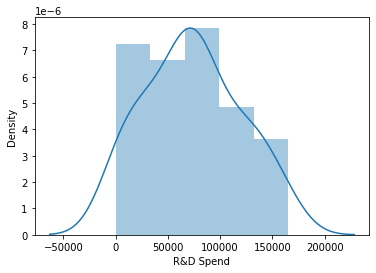

C:\Users\korla\Anaconda3\envs\mine\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


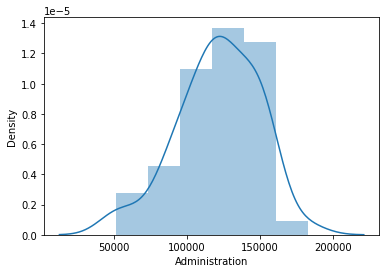

C:\Users\korla\Anaconda3\envs\mine\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


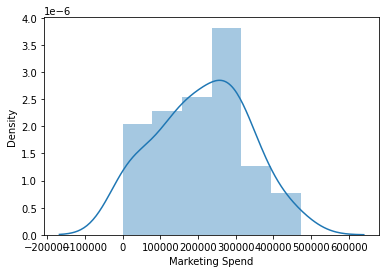

C:\Users\korla\Anaconda3\envs\mine\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


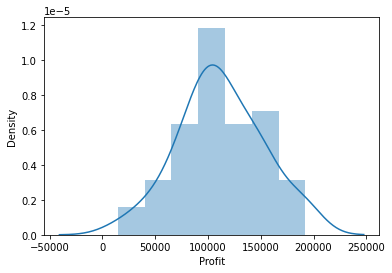

C:\Users\korla\Anaconda3\envs\mine\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


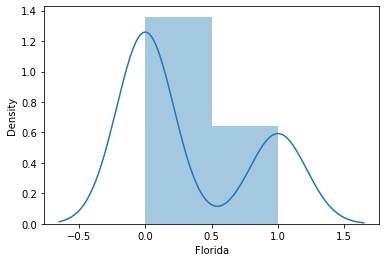

C:\Users\korla\Anaconda3\envs\mine\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


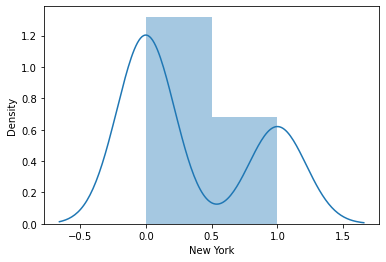

In [159]:
for i in a:
    sns.distplot(df[i])
    plt.show()

In [160]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [162]:
X = df.drop(['Profit'],axis = 1)
y = df['Profit']


In [163]:
X.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [164]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [165]:
from sklearn.model_selection import train_test_split

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [168]:
X_train.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
46,1315.46,115816.21,297114.46,1,0
47,0.00,135426.92,0.00,0,0
15,114523.61,122616.84,261776.23,0,1
9,123334.88,108679.17,304981.62,0,0
16,78013.11,121597.55,264346.06,0,0


In [169]:
len(X_train) , len(y_train)

(33, 33)

In [170]:
len(X_test),len(y_test)

(17, 17)

In [171]:
from sklearn.linear_model import LinearRegression

In [172]:
reg = LinearRegression()

In [173]:
reg.fit(X_train , y_train)

LinearRegression()

In [174]:
X_train.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Florida',
       'New York'],
      dtype='object')

In [175]:
reg.coef_

array([ 8.04312540e-01, -8.99140461e-02,  2.84812890e-02,  4.03924487e+02,
       -1.21407965e+03])

In [176]:
reg.intercept_

57183.41295217191

In [177]:
from sklearn.metrics import r2_score

In [178]:
y_train_pred = reg.predict(X_train)

In [179]:
r2_score(y_train , y_train_pred)

0.9483841429755522

In [182]:
reg.score(X_train,y_train)  #

0.9483841429755522

In [180]:
y_test_pred = reg.predict(X_test)

In [181]:
r2_score(y_test,y_test_pred)

0.9475312056928278

In [183]:
reg.score(X_test,y_test)

0.9475312056928278

In [184]:
X_train.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
46,1315.46,115816.21,297114.46,1,0
47,0.00,135426.92,0.00,0,0
15,114523.61,122616.84,261776.23,0,1
9,123334.88,108679.17,304981.62,0,0
16,78013.11,121597.55,264346.06,0,0


In [185]:
reg.predict([[12.2,13.4,17,0,0]])

array([57192.50489886])